In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train = train_data.copy() 
test = test_data.copy()

In [198]:
pred = train_data['Survived']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train = train.drop("PassengerId", axis = 1)
test = test.drop("PassengerId", axis = 1)

In [14]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.shape

(891, 11)

In [12]:
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.shape

(418, 10)

In [16]:
#checking for missing  values

In [17]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [19]:
len(train[train.isnull().any(axis=1)])

708

In [20]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [22]:
len(test[test.isnull().any(axis=1)])

331

#### EDA

In [23]:
#Analysing independent variables in our train_data and test_data datasets

In [27]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
# Sex 

<AxesSubplot:xlabel='Sex', ylabel='count'>

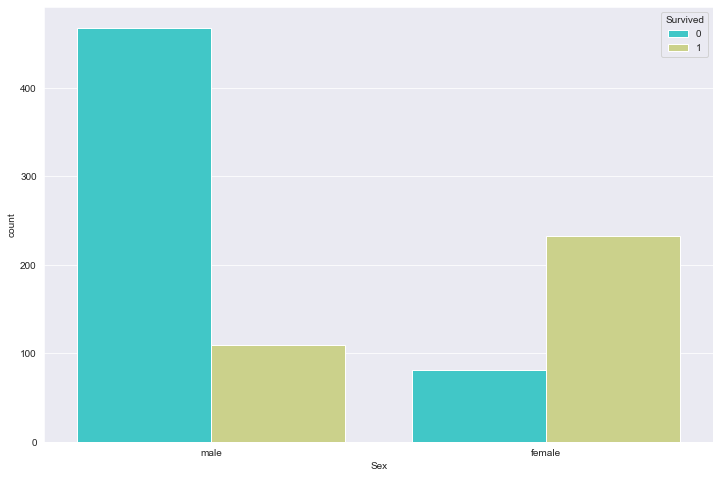

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(data = train_data, x = 'Sex' , hue = 'Survived', palette= 'rainbow' )

In [30]:
sex1 = pd.get_dummies(train['Sex'])
sex2 = pd.get_dummies(test['Sex'])

In [31]:
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

train = pd.concat([train,sex1],axis=1)
test = pd.concat([test,sex2],axis=1)

In [32]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [33]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,0
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1,0


In [36]:
train.shape,test.shape

((891, 11), (418, 10))

In [35]:
train.drop(['female'],axis=1,inplace=True) 
test.drop(['female'],axis=1,inplace=True) 

In [ ]:
# Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

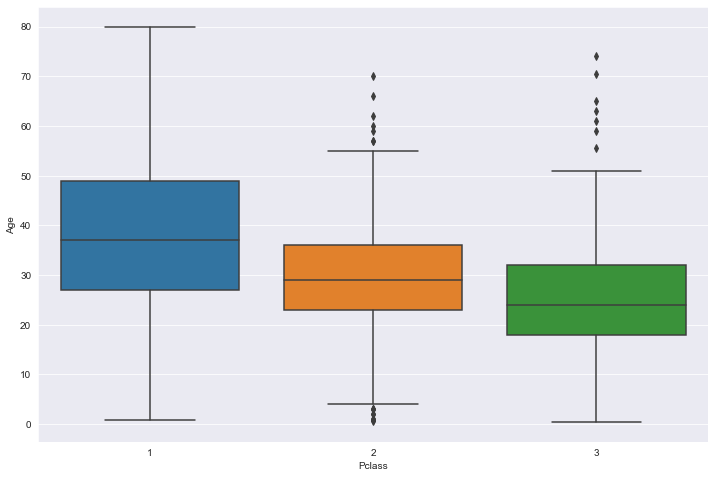

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data = train_data)

In [ ]:
#Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

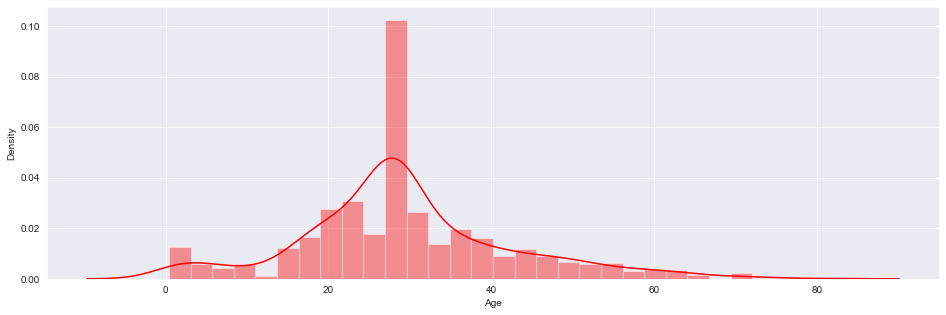

In [87]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
sns.distplot(train["Age"], color="red",ax = axes)


In [50]:
!pip install cufflinks

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached retrying-1.3.3-py3-none-any.whl


In [51]:
import cufflinks as cf

In [52]:
cf.go_offline()

In [53]:
train_data['Age'].iplot(kind = 'hist', bins = 30 , color = 'blue')

In [62]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [63]:
train.shape, test.shape

((891, 11), (418, 10))

In [64]:
#Replacing missing values in Age with its median

In [65]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [74]:
train['Age'].describe().loc[['50%']][0]

28.0

In [71]:
type(train['Age'].describe())

pandas.core.series.Series

In [75]:
train["Age"].fillna(train['Age'].describe().loc[['50%']][0], inplace = True) 
test["Age"].fillna(test['Age'].describe().loc[['50%']][0], inplace = True) 

In [76]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
male          0
dtype: int64

In [78]:
test.isnull().sum()

Pclass        0
Name          0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
male          0
dtype: int64

In [ ]:
#Fare

In [99]:
Fare_dead = []
Fare_Survived = []

In [96]:
train['Survived'][0]

0

In [97]:
train['Fare'][0]

7.25

In [100]:
for i in range(0,891):
    if train["Survived"][i] == 0:
        Fare_dead.append(train["Fare"][i])
    else:
         Fare_Survived.append(train["Fare"][i])

Text(0.5, 1.0, 'Fare distribution of people who survived')

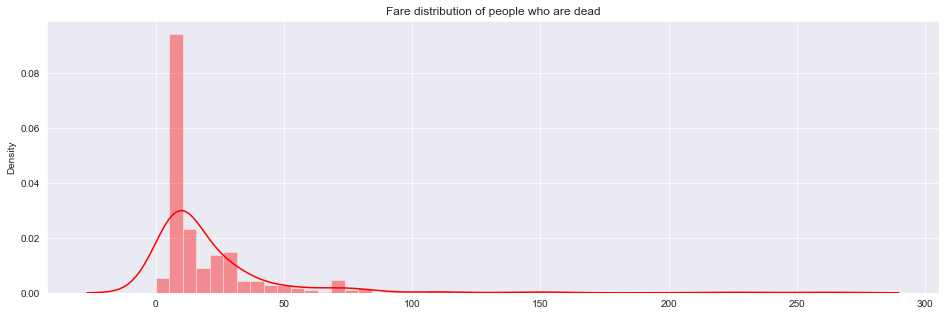

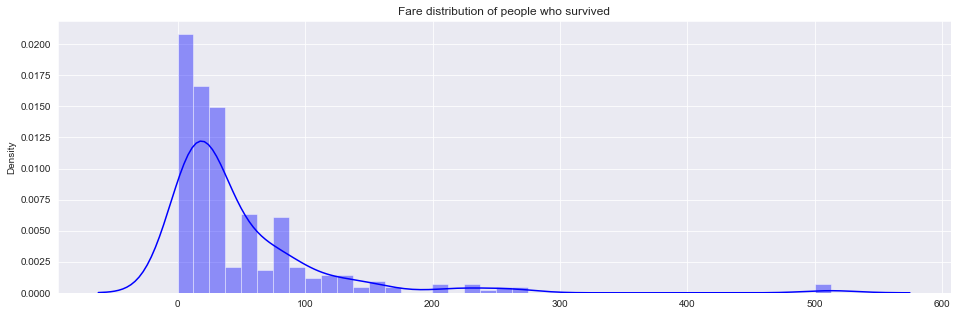

In [102]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
sns.distplot(Fare_dead, color="red",ax = axes)
plt.title("Fare distribution of people who are dead")



f, axes = plt.subplots(1,1, figsize = (16, 5))
sns.distplot(Fare_Survived, color="blue",ax = axes)
plt.title("Fare distribution of people who survived")



In [103]:
#Conclusion: People who paid more had a higher probability of surviving

In [104]:
train["Fare"].fillna(train['Fare'].describe().loc[['50%']][0], inplace = True) 

In [105]:
test["Fare"].fillna(test['Fare'].describe().loc[['50%']][0], inplace = True) 

In [ ]:
#Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

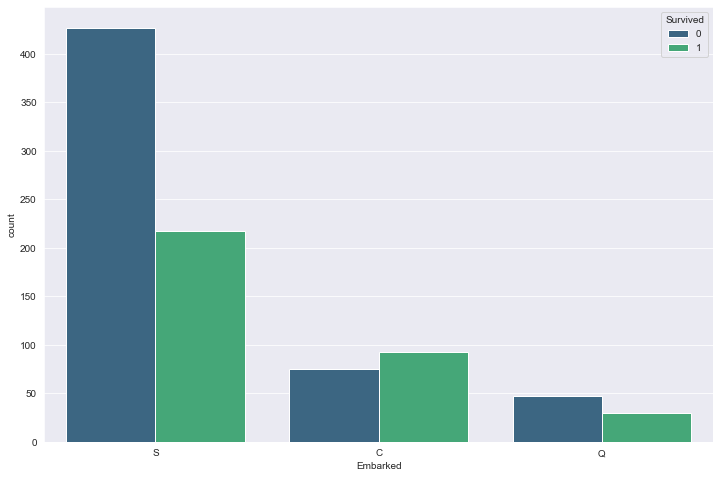

In [107]:
plt.figure(figsize=(12,8))
sns.countplot(data = train_data, x= 'Embarked', hue = 'Survived', palette= 'viridis')

In [109]:
train_data['Embarked'].value_countsounts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Replacing the missing values in Embarked with most frequent value "S"

In [110]:
train["Embarked"].fillna("S", inplace = True) 
test["Embarked"].fillna("S", inplace = True) 

In [111]:
embark1 = pd.get_dummies(train['Embarked'])
embark2 = pd.get_dummies(test['Embarked'])

train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)

train = pd.concat([train,embark1],axis=1)
test = pd.concat([test,embark2],axis=1)

In [116]:
train.shape, test.shape

((891, 12), (418, 11))

In [117]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [118]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,S
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,0
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1


In [115]:
train.drop(['Q'],axis=1,inplace=True) 
test.drop(['Q'],axis=1,inplace=True) 

In [ ]:
#Sibp &  Parch

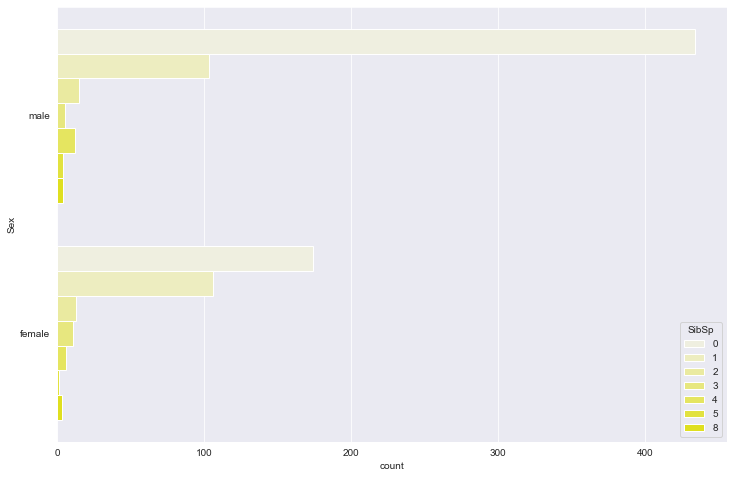

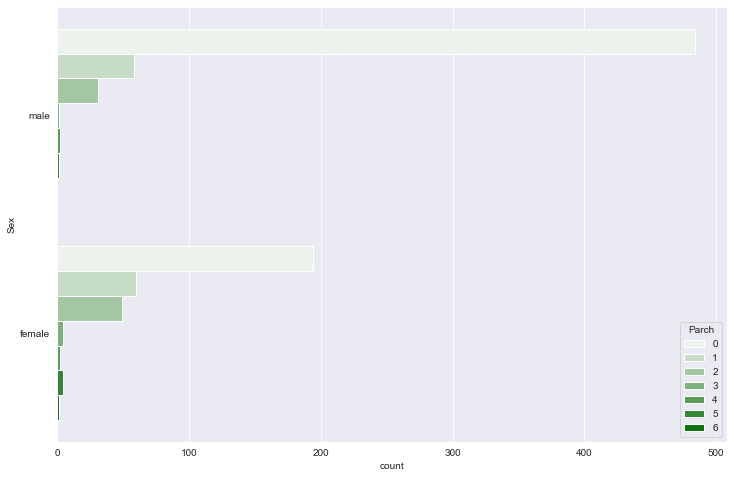

In [120]:
plt.figure(figsize=(12, 8))
sns.countplot(y="Sex", hue="SibSp", data=train_data ,color = "Yellow" )

plt.figure(figsize=(12, 8))
sns.countplot(y="Sex", hue="Parch", data=train_data , color = "Green" )

plt.show()

In [122]:
train[train['SibSp']+train['Parch'] > 0]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,1,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,1,0,P/PP 3381,24.0000,NaN,0,1,0
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,0,1,0
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",25.0,0,1,230433,26.0000,NaN,0,0,1
885,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,0,0,0


In [124]:
def fam(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 1
    else:
        return 0



train['Family'] = train.apply(fam, axis = 1)
test['Family'] = test.apply(fam, axis = 1)


Using the above fn. we are combining the SibSp and Parch columns into one column "Family" and determining whether the passenger has a family or not

In [125]:
train = train.drop(['SibSp','Parch'],axis=1)
test = test.drop(['SibSp','Parch'],axis=1)

In [126]:
train.head()

,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,S,Family
0,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,1,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,0,1,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,0,0,1,1
4,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,1,0,1,0


In [127]:
test.head()

,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,S,Family
0,3,"Kelly, Mr. James",34.5,330911,7.8292,NaN,1,0,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,0,0,1,1
2,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,1,0,0,0
3,3,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,1,0,1,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,0,0,1,1


In [128]:
train.shape,test.shape

((891, 11), (418, 10))

<AxesSubplot:xlabel='Family', ylabel='count'>

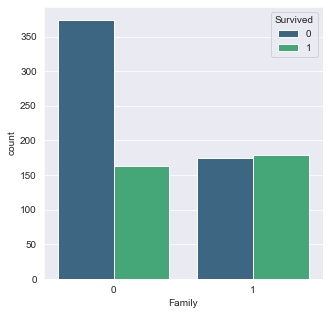

In [130]:
plt.figure(figsize=(5,5))
sns.countplot(data = train, x = 'Family', hue = 'Survived', palette= 'viridis')

Conclusion : A passenger having no family had a lesser chance of survival.

In [131]:
#Cabin

In [132]:
type(train['Cabin'])

pandas.core.series.Series

In [148]:
for i in train['Cabin']:
    print(type(i))


<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<cla

In [137]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [138]:
train["Cabin"][0]

nan

In [145]:
 not pd.isnull(train["Cabin"][1])

True

In [152]:
#Replacing NaN values in cabin by 'X' and extracting prefix of non NaN values

In [149]:
train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ])
test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin'] ])

In [150]:
train.head()

,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,S,Family
0,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,X,1,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,0,1,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,X,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C,0,0,1,1
4,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,X,1,0,1,0


In [151]:
test.head()

,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,S,Family
0,3,"Kelly, Mr. James",34.5,330911,7.8292,X,1,0,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,X,0,0,1,1
2,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,X,1,0,0,0
3,3,"Wirz, Mr. Albert",27.0,315154,8.6625,X,1,0,1,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,X,0,0,1,1


In [158]:
train['Cabin'].value_counts().sort_values(ascending = False)

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [159]:
test['Cabin'].value_counts().sort_values(ascending = False)

X    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [ ]:
#Label Encoding

In [162]:
train["Cabin"] = train["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
train["Cabin"] = train["Cabin"].astype(int)
test["Cabin"] = test["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
test["Cabin"] = test["Cabin"].astype(int)

In [163]:
train.shape,test.shape

((891, 11), (418, 10))

In [164]:
train.head()

,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,S,Family
0,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,1,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,3,0,1,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,3,0,0,1,1
4,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,0,1,0,1,0


In [165]:
test.head()

,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,S,Family
0,3,"Kelly, Mr. James",34.5,330911,7.8292,0,1,0,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,0,1,1
2,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,0,1,0,0,0
3,3,"Wirz, Mr. Albert",27.0,315154,8.6625,0,1,0,1,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,0,1,1


In [178]:
train_title = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(train_title)
test_title = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(test_title)

In [179]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [180]:
train.shape,test.shape

((891, 11), (418, 10))

In [181]:
train.head()

,Survived,Pclass,Age,Ticket,Fare,Cabin,male,C,S,Family,Title
0,0,3,22.0,A/5 21171,7.2500,0,1,0,1,1,Mr
1,1,1,38.0,PC 17599,71.2833,3,0,1,0,1,Mrs
2,1,3,26.0,STON/O2. 3101282,7.9250,0,0,0,1,0,Miss
3,1,1,35.0,113803,53.1000,3,0,0,1,1,Mrs
4,0,3,35.0,373450,8.0500,0,1,0,1,0,Mr


In [185]:
test.head()

,Pclass,Age,Ticket,Fare,Cabin,male,C,S,Family,Title
0,3,34.5,330911,7.8292,0,1,0,0,0,Mr
1,3,47.0,363272,7.0000,0,0,0,1,1,Mrs
2,2,62.0,240276,9.6875,0,1,0,0,0,Mr
3,3,27.0,315154,8.6625,0,1,0,1,0,Mr
4,3,22.0,3101298,12.2875,0,0,0,1,1,Mrs


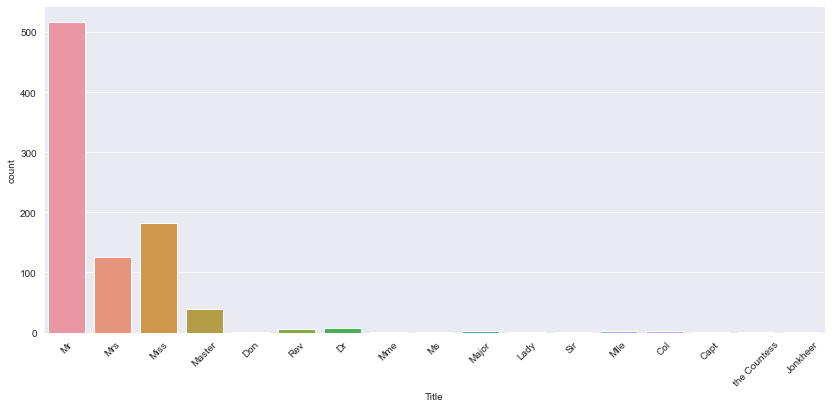

In [186]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="Title",data=train)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [187]:
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train["Title"] = train["Title"].astype(int)
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test["Title"] = test["Title"].astype(int)

In [188]:
train.head()

,Survived,Pclass,Age,Ticket,Fare,Cabin,male,C,S,Family,Title
0,0,3,22.0,A/5 21171,7.2500,0,1,0,1,1,2
1,1,1,38.0,PC 17599,71.2833,3,0,1,0,1,1
2,1,3,26.0,STON/O2. 3101282,7.9250,0,0,0,1,0,1
3,1,1,35.0,113803,53.1000,3,0,0,1,1,1
4,0,3,35.0,373450,8.0500,0,1,0,1,0,2


In [196]:
train.head()

,Survived,Pclass,Age,Ticket,Fare,Cabin,male,C,S,Family,Title
0,0,3,22.0,A/5 21171,7.2500,0,1,0,1,1,2
1,1,1,38.0,PC 17599,71.2833,3,0,1,0,1,1
2,1,3,26.0,STON/O2. 3101282,7.9250,0,0,0,1,0,1
3,1,1,35.0,113803,53.1000,3,0,0,1,1,1
4,0,3,35.0,373450,8.0500,0,1,0,1,0,2


In [195]:
test.head()

,Pclass,Age,Ticket,Fare,Cabin,male,C,S,Family,Title
0,3,34.5,330911,7.8292,0,1,0,0,0,2
1,3,47.0,363272,7.0000,0,0,0,1,1,1
2,2,62.0,240276,9.6875,0,1,0,0,0,2
3,3,27.0,315154,8.6625,0,1,0,1,0,2
4,3,22.0,3101298,12.2875,0,0,0,1,1,1


In [197]:
train.shape,test.shape

((891, 11), (418, 10))

In [199]:
#Ticket

In [200]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [226]:
Ticket1 = []
for i in list(train.Ticket):
    if not i.isdigit() :
        Ticket1.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket1.append("X")
train["Ticket"] = Ticket1

Ticket2 = []
for j in list(test.Ticket):
    if not j.isdigit() :
        Ticket2.append(j.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket2.append("X")
test["Ticket"] = Ticket2

In [227]:
train["Ticket"].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [228]:
test["Ticket"].unique()

array(['X', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3'], dtype=object)

In [229]:
np.union1d(train["Ticket"], test["Ticket"])

array(['A', 'A4', 'A5', 'AQ3', 'AQ4', 'AS', 'C', 'CA', 'CASOTON', 'FC',
       'FCC', 'Fa', 'LINE', 'LP', 'PC', 'PP', 'PPP', 'SC', 'SCA3', 'SCA4',
       'SCAH', 'SCOW', 'SCPARIS', 'SCParis', 'SOC', 'SOP', 'SOPP',
       'SOTONO2', 'SOTONOQ', 'SP', 'STONO', 'STONO2', 'STONOQ', 'SWPP',
       'WC', 'WEP', 'X'], dtype=object)

In [230]:
train= pd.get_dummies(train, columns = ["Ticket"], prefix="T")
test = pd.get_dummies(test, columns = ["Ticket"], prefix="T")

In [231]:
train.shape,test.shape

((891, 41), (418, 37))

In [233]:
train.head()

,Survived,Pclass,Age,Fare,Cabin,male,C,S,Family,Title,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,0,3,22.0,7.2500,0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,71.2833,3,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,35.0,53.1000,3,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1


In [234]:
test.head()

,Pclass,Age,Fare,Cabin,male,C,S,Family,Title,T_A,...,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_X
0,3,34.5,7.8292,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
1,3,47.0,7.0000,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,62.0,9.6875,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
3,3,27.0,8.6625,0,1,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,1
4,3,22.0,12.2875,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [235]:
train = train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'],axis = 1)
test = test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1)


In [236]:
train.drop(['Survived'],axis=1,inplace=True)

In [237]:
print(train.isnull().sum())
print("Number of columns are :",train.isnull().sum().count())

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are : 31


In [243]:
print(test.isnull().sum())
print("Number of columns are :",test.isnull().sum().count())

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are : 31


In [246]:
train = train.drop(['Cabin'],axis = 1)
test = test.drop(['Cabin'],axis = 1)

In [249]:
train.shape,test.shape

((891, 30), (418, 30))

In [ ]:
#Scaling

In [247]:
from sklearn.preprocessing import StandardScaler

In [248]:
scale = StandardScaler()

In [250]:
Xtrain =  scale.fit_transform(train)
Xtest =  scale.fit_transform(test)

In [252]:
type(pred)

pandas.core.series.Series

In [253]:
type(Xtrain)

numpy.ndarray

In [254]:
Xtrain.shape

(891, 30)

In [255]:
Xtest.shape

(418, 30)

In [256]:
pred.shape

(891,)

In [257]:
#Model training and hyperparameter tuning

In [259]:
from sklearn.model_selection import GridSearchCV

In [258]:
param_grid = { 
    'n_estimators': [ 200,300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
rfc = RandomForestClassifier(random_state=0)

In [263]:
random_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)


In [264]:
random_rf.fit(Xtrain,pred)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [266]:
random_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 300}

In [268]:
classifier =RandomForestClassifier(random_state=0, n_estimators= 300, criterion = 'entropy',max_features = 'auto',max_depth = 6)
classifier.fit(Xtrain, pred)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=300,
                       random_state=0)

In [269]:
y_pred = classifier.predict(Xtest)

In [270]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [271]:
predict=pd.DataFrame(y_pred)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],predict],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('sample_submission.csv',index=False)